<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/de_grafos_a_models_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# create_model_from_graph

In [ ]:
def crear_fila_conexiones(n):
  num_ones = np.random.randint(1, n + 1)
  array = np.array([1]*num_ones + [0]*(n-num_ones))
  np.random.shuffle(array)
  return array


def crear_fila_conexiones_0(n):
  num_ones = np.random.randint(0, n+1)
  array = np.array([1]*num_ones + [0]*(n-num_ones))
  np.random.shuffle(array)
  return array

def create_matrix_for_graph():
  adjacency_matrix = [
      np.concatenate((  np.array([0]) ,         crear_fila_conexiones(5) )),
      np.concatenate((  np.array([0,0]) ,       crear_fila_conexiones_0(4)  )),
      np.concatenate((  np.array([0,0,0]) ,     crear_fila_conexiones_0(3)  )),
      np.concatenate((  np.array([0,0,0,0]) ,   crear_fila_conexiones_0(2)  )),
      np.concatenate((  np.array([0,0,0,0,0]) , crear_fila_conexiones_0(1)  )),
      np.array([0,0,0,0,0,0]),
  ]
  return adjacency_matrix

orden nodos
0
1
2
3
4
5
-----
----- NUEVA RED -----
current_nodo: 0
graph.in_degree(node) 0
node_outputs  {0: <KerasTensor: shape=(None, 100, 2) dtype=float32 (created by layer 'Densa_0')>}
current_nodo: 1
graph.in_degree(node) 1
len clean  False
desconectados: set()
predecessors: [0]
LEN predecessors: 1
[<KerasTensor: shape=(None, 100, 2) dtype=float32 (created by layer 'Densa_0')>]
node_outputs  {0: <KerasTensor: shape=(None, 100, 2) dtype=float32 (created by layer 'Densa_0')>, 1: <KerasTensor: shape=(None, 100, 4) dtype=float32 (created by layer 'Densa_1')>}
current_nodo: 2
graph.in_degree(node) 2
len clean  False
desconectados: set()
predecessors: [0, 1]
LEN predecessors: 2
node_outputs  {0: <KerasTensor: shape=(None, 100, 2) dtype=float32 (created by layer 'Densa_0')>, 1: <KerasTensor: shape=(None, 100, 4) dtype=float32 (created by layer 'Densa_1')>, 2: <KerasTensor: shape=(None, 100, 2) dtype=float32 (created by layer 'Densa_2')>}
current_nodo: 3
graph.in_degree(node) 2
len clean

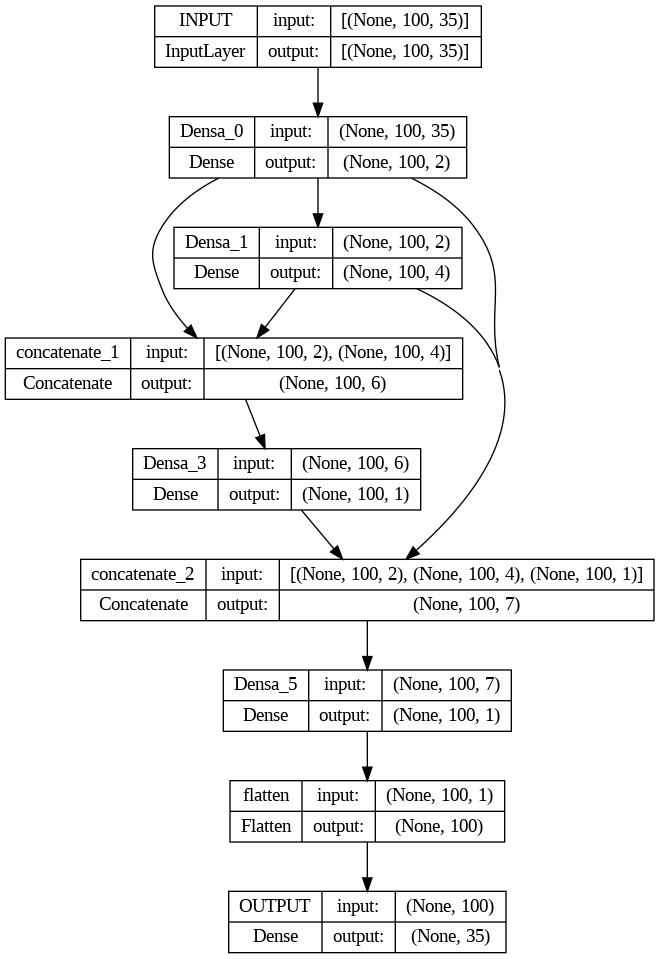

In [ ]:
from keras.layers import Input, Dense, concatenate, Conv1D, Flatten
from keras.models import Model
import numpy as np
import networkx as nx
from keras.utils import plot_model
from keras.optimizers import Adam


def output_layer(node_outputs, output_shape, activation='softmax' ):
    """
    node_outputs[len(node_outputs)] = Flatten()(list(node_outputs.values())[-1])
    # Crear ultima capa densa para el modelo
    node_output = Dense(output_shape, activation=activation, name="OUTPUT"  )(list(node_outputs.values())[-1])
    # Almacenar la salida
    """

    m = Flatten()(list(node_outputs.values())[-1])
    # Crear ultima capa densa para el modelo
    node_output = Dense(output_shape, activation=activation, name="OUTPUT"  )(m)
    # Almacenar la salida


    return node_output

def normal_layer(node, node_input):
    return Dense( np.random.randint(1, 5), activation='relu', name="Densa_" + str(node) )(node_input)

def create_model_from_graph(graph, input_shape, output_shape):
    # Crear una capa de entrada para el modelo
    input_layer = Input(shape=input_shape, name="INPUT")

    # Crear un diccionario para almacenar las salidas de las capas para cada nodo
    node_outputs = {}
    disconnected_nodes = set()  # para almacenar nodos desconectados

    # CONFIGURACION RED INTERNA
    print("----- NUEVA RED -----")
    # Procesar los nodos en orden topológico
    for node in nx.topological_sort(graph):
        node_input = None

        print("current_nodo:" ,node )
        print("graph.in_degree(node)", graph.in_degree(node))
        #print("predecessors:",len([predecessor for predecessor in graph.predecessors(node)]) )



        #if (graph.in_degree(node) == 0) and (node == 0) :
        if (graph.in_degree(node) == 0) and (len(node_outputs) == 0) :
            # El primer nodo tiene el input como entrada , OBLIGATORIO, es el priemro de todos y nunca tiene "padre"
            node_input = input_layer
        elif (graph.in_degree(node) == 0) and (node != 0 ):
            # Si el nodo no tiene predecesores, su entrada es la capa de entrada del modelo
            disconnected_nodes.add(node)
            print("nodo desconectado")
            continue

        else:
            len_aux =  len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            # Todos sus predecesores estan desconectados
            if(len_aux == 0):
              disconnected_nodes.add(node)
              print("nodo desconectado2")
              continue
            print("len clean ", len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes]) == 0)
            # Verificar si el nodo actual tiene algún predecesor desconectado
            #if any(predecessor in disconnected_nodes for predecessor in graph.predecessors(node)):
                #disconnected_nodes.add(node)
                #continue
            print("desconectados:" ,disconnected_nodes )
            print("predecessors:",[predecessor for predecessor in graph.predecessors(node)] )
            print("LEN predecessors:",len([predecessor for predecessor in graph.predecessors(node)]))

            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores
            #node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node)])
            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores

            if len([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes]) > 1:
              node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
            else:
              print([node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes])
              node_input = [node_outputs[predecessor] for predecessor in graph.predecessors(node) if predecessor not in disconnected_nodes][0]

        # Crear una capa densa para el nodo
        node_output = normal_layer(node, node_input)

        # Almacenar la salida de la capa para este nodo
        node_outputs[node] = node_output
        print("node_outputs ", node_outputs)

    # CONFIGURACION PARA SALIDA
    #node_outputs[-1] = output_layer(node_outputs, output_shape, activation='relu' )

    # La salida del modelo es la salida de la última capa creada
    #model_output = list(node_outputs.values())[-1]
    #model_output = output_layer(node_outputs, output_shape, activation='softmax' )

    model_output = output_layer(node_outputs, output_shape, activation='softmax' )
    # Crear el modelo de Keras
    model = Model(inputs=input_layer, outputs=model_output)
    #model = Model(inputs=[input_layer, input_layer_1], outputs=model_output)

    return model

# Crea un grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(np.array(create_matrix_for_graph()), create_using=nx.DiGraph)

print("orden nodos")
for g in nx.topological_sort(G):

  print(g)
print("-----")

model = create_model_from_graph(G, (100,35), 35)
model.compile(optimizer='adam', loss='mse')
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)



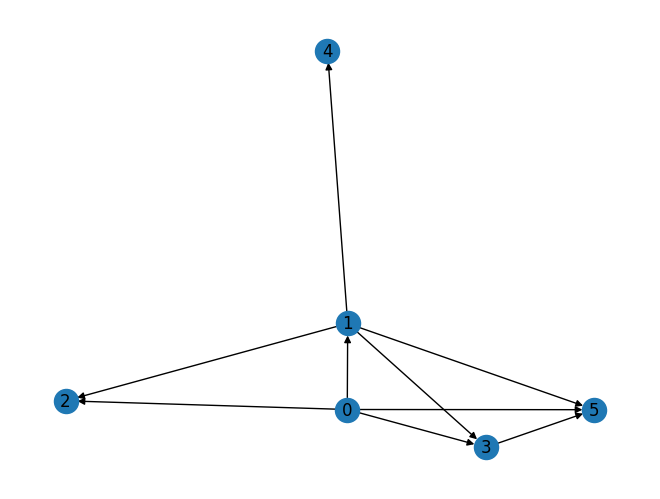

In [ ]:
# Dibujar el grafo
nx.draw(G, with_labels=True)

# test cteate model N veces

In [ ]:
array_1 = np.random.rand(100, 32, 32)
# Crear un array aleatorio de shape (100, 10)
array_2 = np.random.rand(100, 10)

In [ ]:

for i in range(1000):
  print(i)
  # Crea un grafo a partir de la matriz de adyacencia
  G = nx.from_numpy_array(np.array(create_matrix_for_graph()), create_using=nx.DiGraph)
  matrix = create_matrix_for_graph()
  # Crea un grafo a partir de la matriz de adyacencia
  G = nx.from_numpy_array(np.array(matrix), create_using=nx.DiGraph)

  model = create_model_from_graph(G, array_1.shape[1:], array_2.shape[1])

  lr = 0.01  # Puedes cambiar este valor por el learning rate que desees
  optimizer = Adam(learning_rate=lr)
  # Compila tu modelo con el optimizador personalizado
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  model.fit(array_1, array_2, epochs=1, batch_size=1)


Streaming output truncated to the last 5000 lines.
current_nodo: 1
graph.in_degree(node) 0
nodo desconectado
current_nodo: 4
graph.in_degree(node) 0
nodo desconectado
current_nodo: 2
graph.in_degree(node) 2
len clean  False
desconectados: {1, 4}
predecessors: [0, 1]
LEN predecessors: 2
[<KerasTensor: shape=(None, 32, 3) dtype=float32 (created by layer 'Densa_0')>]
node_outputs  {0: <KerasTensor: shape=(None, 32, 3) dtype=float32 (created by layer 'Densa_0')>, 2: <KerasTensor: shape=(None, 32, 1) dtype=float32 (created by layer 'Densa_2')>}
current_nodo: 5
graph.in_degree(node) 1
nodo desconectado2
current_nodo: 3
graph.in_degree(node) 3
len clean  False
desconectados: {1, 4, 5}
predecessors: [0, 1, 2]
LEN predecessors: 3
node_outputs  {0: <KerasTensor: shape=(None, 32, 3) dtype=float32 (created by layer 'Densa_0')>, 2: <KerasTensor: shape=(None, 32, 1) dtype=float32 (created by layer 'Densa_2')>, 3: <KerasTensor: shape=(None, 32, 2) dtype=float32 (created by layer 'Densa_3')>}
100/100 

# crear individuo

In [ ]:
def create_matrix_for_graph():
  adjacency_matrix = [
      np.concatenate((  np.array([0]) ,         crear_fila_conexiones(5) )),
      np.concatenate((  np.array([0,0]) ,       crear_fila_conexiones_0(4)  )),
      np.concatenate((  np.array([0,0,0]) ,     crear_fila_conexiones_0(3)  )),
      np.concatenate((  np.array([0,0,0,0]) ,   crear_fila_conexiones_0(2)  )),
      np.concatenate((  np.array([0,0,0,0,0]) , crear_fila_conexiones_0(1)  )),
      np.array([0,0,0,0,0,0]),
  ]
  return adjacency_matrix


create_matrix_for_graph()

[array([0, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0])]

In [ ]:
neurones_range = [5, 10]
l2_range = [0,0.3,0.6,0.9]
dropout_range = [0,0.3,0.6,0.9]

ind = np.concatenate((
  crear_fila_conexiones(5) ,
  crear_fila_conexiones_0(4),
  crear_fila_conexiones_0(3),
  crear_fila_conexiones_0(2),
  crear_fila_conexiones_0(1),

  np.random.choice(neurones_range, size=1),
  np.random.choice(neurones_range, size=1),
  np.random.choice(neurones_range, size=1),
  np.random.choice(neurones_range, size=1),
  np.random.choice(neurones_range, size=1),
  np.random.choice(neurones_range, size=1),

  np.random.choice(l2_range, size=1),
  np.random.choice(l2_range, size=1),
  np.random.choice(l2_range, size=1),
  np.random.choice(l2_range, size=1),
  np.random.choice(l2_range, size=1),
  np.random.choice(l2_range, size=1),

  np.random.choice(dropout_range, size=1),
  np.random.choice(dropout_range, size=1),
  np.random.choice(dropout_range, size=1),
  np.random.choice(dropout_range, size=1),
  np.random.choice(dropout_range, size=1),
  np.random.choice(dropout_range, size=1),


))

ind

array([ 0. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  1. ,
        0. ,  0. ,  1. ,  0. , 10. ,  5. , 10. , 10. ,  5. ,  5. ,  0. ,
        0.9,  0.3,  0.9,  0.3,  0.9,  0.6,  0.3,  0. ,  0. ,  0.9,  0. ])

In [ ]:
ind[0:5]

array([0., 0., 0., 1., 1.])

In [ ]:
ind[5:9]

array([1., 1., 0., 1.])

In [ ]:
ind[9:12]

array([1., 1., 1.])

In [ ]:
ind[12:14]

array([1., 1.])

In [ ]:
ind[14:15]

array([1.])

In [ ]:
ind[15:21]

array([10.,  5., 10., 10.,  5.,  5.])

In [ ]:
ind[21:27]

array([0. , 0.9, 0.3, 0.9, 0.3, 0.9])

In [ ]:
ind[27:33]

array([0.6, 0.3, 0. , 0. , 0.9, 0. ])

In [ ]:
ind[33:]

array([], dtype=float64)

# TRAIN DATA

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical


# Carga el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normaliza las imágenes para que estén en el rango [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convierte las etiquetas a formato one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape, train_labels.shape

In [ ]:
train_labels.shape[1]

In [ ]:
# Crea un grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(np.array(create_matrix_for_graph()), create_using=nx.DiGraph)

print("orden nodos")
for g in nx.topological_sort(G):

  print(g)
print("-----")

matrix = create_matrix_for_graph()
# Crea un grafo a partir de la matriz de adyacencia
# Crea un grafo a partir de la matriz de adyacencia
print(matrix)
G = nx.from_numpy_array(np.array(matrix), create_using=nx.DiGraph)


model = create_model_from_graph(G, train_images.shape[1:], train_labels.shape[1])

lr = 0.01  # Puedes cambiar este valor por el learning rate que desees
optimizer = Adam(learning_rate=lr)
# Compila tu modelo con el optimizador personalizado
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
from keras.callbacks import EarlyStopping
# Define el callback EarlyStopping
early_stopping_val_loss = EarlyStopping(monitor='val_loss', patience = 10, verbose=1, restore_best_weights=True)
#early_stopping_val_accuracy = EarlyStopping(monitor='val_accuracy', patience = 10, verbose=1, restore_best_weights=True)

model.fit(train_images, train_labels, epochs=1000, batch_size=5000, validation_split = 0.3, callbacks=early_stopping_val_loss)